In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn. linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib. pyplot as plt
import seaborn as sns

In [6]:
def adj_r2(x,y):
    r2=regression.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [9]:
data=pd.read_csv("SP500_Stock_Data.csv")
data.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [10]:
data.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


/var/folders/5q/gpv34crs7wl615lky8s5dql00000gn/T/ipykernel_34500/575060854.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/5q/gpv34crs7wl615lky8s5dql00000gn/T/ipykernel_34500/575060854.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/5

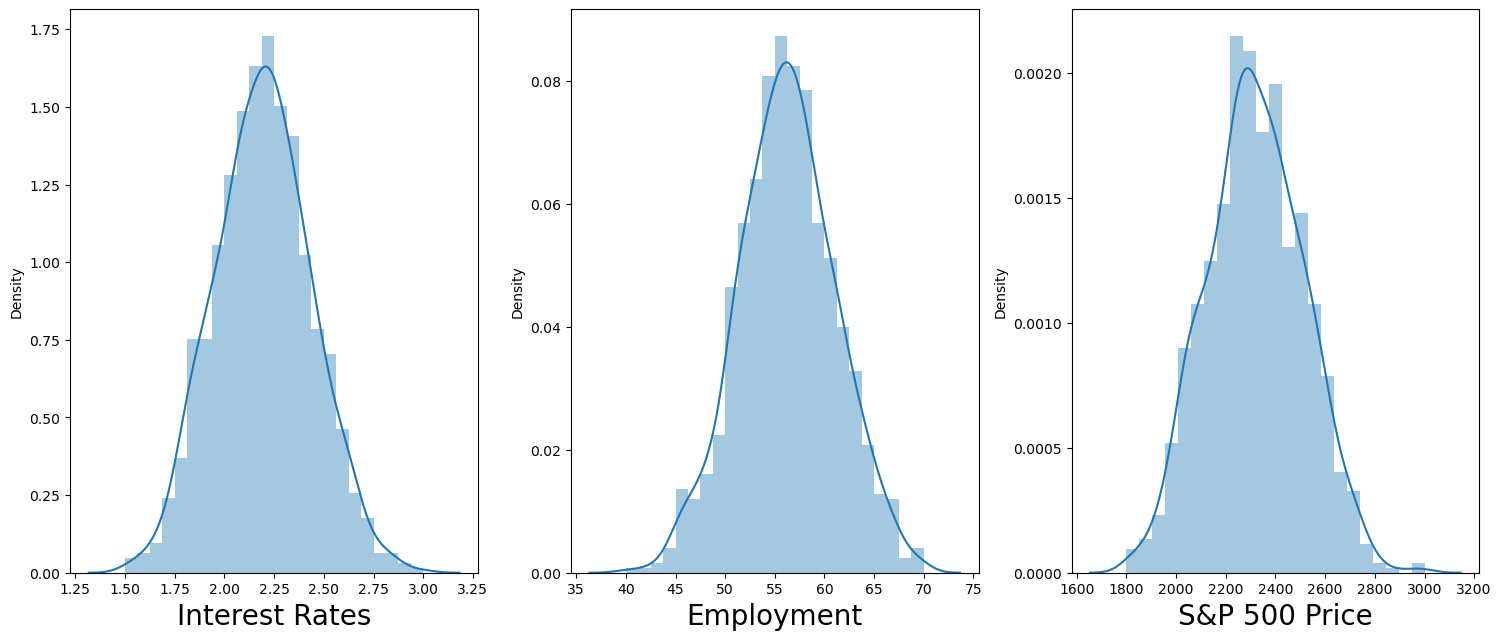

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #pltylabel('salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
y= data['S&P 500 Price']
X= data.drop(columns=["S&P 500 Price"])

In [13]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [14]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

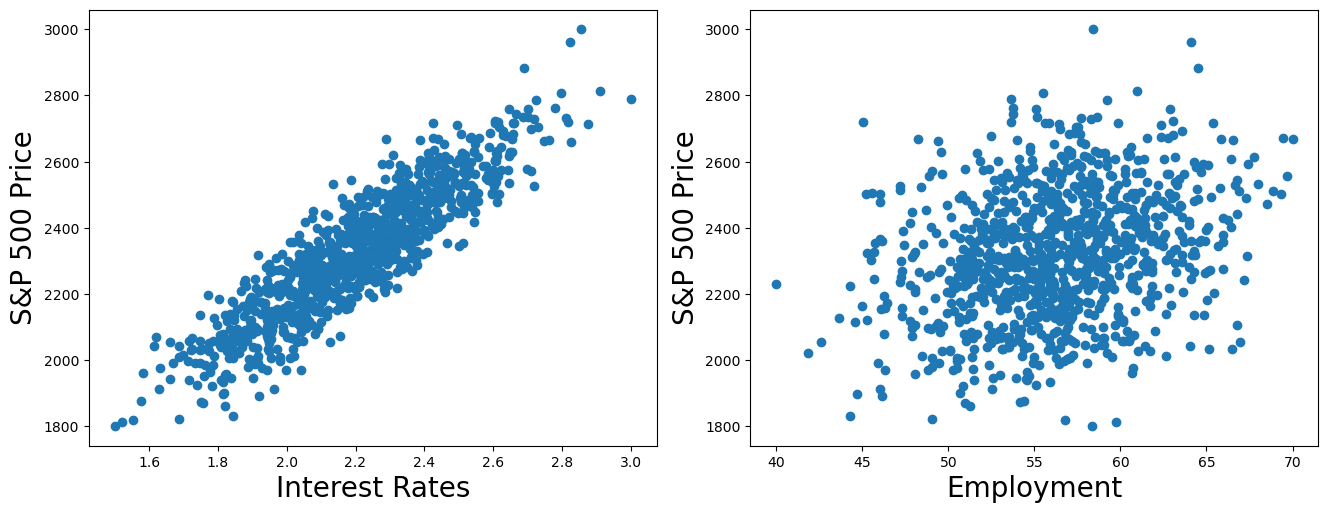

In [15]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('S&P 500 Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
scaler=StandardScaler()
scaler

StandardScaler()

In [17]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [18]:
X_scaled=scaler.fit_transform(X)

In [19]:
X_scaled

array([[-1.04150384, -0.1731128 ],
       [ 0.26018619,  0.67728834],
       [ 0.08476338,  0.23866087],
       ...,
       [-0.76911465,  0.15422648],
       [ 0.02593813,  1.27433291],
       [-0.0610897 , -2.04904125]])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [21]:
x_train.shape

(750, 2)

In [22]:
x_test.shape

(250, 2)

In [23]:
y_train.shape

(750,)

In [24]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
import pickle

In [26]:
filename ='finalised_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [27]:
pwd

'/Users/rawanghanem/Desktop/project'

In [28]:
loaded_model = pickle.load(open(filename, 'rb' ))
a=loaded_model.predict(scaler.transform([[3,70]]))
a

/Users/rawanghanem/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3080.22099917])

In [29]:
regression.score(x_train, y_train)

0.901146349091307

In [30]:
regression.score(x_test, y_test)

0.9011430346891784

In [31]:
adj_r2(x_train,y_train)

0.9008816806819129

In [32]:
adj_r2(x_test,y_test)

0.900342573431601